In [19]:
import pandas as pd
import geopandas as gpd
import pyarrow.parquet as pq
from pathlib import Path
from typing import List

## Stops Data

In [3]:
pt = '/Users/gouherdanish/Documents/Danish/codes/blmc/data/stops_0.csv'

df_stops = pd.read_csv(pt)
df_stops.head()

,stop_id,stop_lat,stop_lon,stop_name
0,22482,13.09943,77.58817,Sheshadripuram College
1,33142,12.76839,77.77011,Anekal Road Junction
2,24833,12.90424,77.47270,Depot-12 Kengeri
3,23309,13.01860,77.55537,Depot-26 Yeshawanthapura
4,33020,13.24270,77.82258,I Basapura


In [39]:
df_stops['stop_id'] = df_stops['stop_id'].astype(str)

In [40]:
df_stops['geometry'] = gpd.points_from_xy(df_stops['stop_lon'],df_stops['stop_lat'],crs="EPSG:4326")
df_stops = gpd.GeoDataFrame(df_stops)
df_stops

,stop_id,stop_lat,stop_lon,stop_name,geometry
0,22482,13.09943,77.58817,Sheshadripuram College,POINT (77.58817 13.09943)
1,33142,12.76839,77.77011,Anekal Road Junction,POINT (77.77011 12.76839)
2,24833,12.90424,77.47270,Depot-12 Kengeri,POINT (77.4727 12.90424)
3,23309,13.01860,77.55537,Depot-26 Yeshawanthapura,POINT (77.55537 13.0186)
4,33020,13.24270,77.82258,I Basapura,POINT (77.82258 13.2427)
...,...,...,...,...,...
12269,39483,13.08471,77.49882,Govt Primary School Chikkabhanavara,POINT (77.49882 13.08471)
12270,22141,13.02596,77.63704,Kalyananagara Junction,POINT (77.63704 13.02596)
12271,21450,13.02546,77.64042,80 feet Road Kalyananagara,POINT (77.64042 13.02546)
12272,33282,13.02200,77.64313,Kalyananagara 1st Block,POINT (77.64313 13.022)


In [41]:
df_stops.shape, df_stops['stop_id'].nunique()

((12274, 5), 12274)

In [42]:
out = '/Users/gouherdanish/Documents/Danish/codes/blmc/data/stops_0.shp'
df_stops.to_file(out)

## Route Data

In [8]:
pt = '/Users/gouherdanish/Documents/Danish/codes/blmc/data/routes.csv'
df_routes = pd.read_csv(pt)
df_routes.head()

,agency_id,route_desc,route_id,route_long_name,route_short_name,route_type
0,38,Central Silk Board - Yeshawanthapura Bus Station,3040,CSB-YBS,500-DJ,3
1,38,Dyavalingaiahnapalya - KR Market (Kalasipalya),2517,DLP-KMT,231-H,3
2,38,Sri Ramapura - Kempegowda Bus Station,2676,286-D SRP-KBS,286-D SRP-KBS,3
3,38,Nelamangala Bus Station - Kempegowda Bus Station,3509,NMG-KBS,258-CC,3
4,38,Hampinagara RPC Layout - Kaval Byrasandra,2725,RPCLO-KVB,176,3


In [10]:
df_routes.describe()

,agency_id,route_id,route_type
count,10719.0,10719.000000,10719.0
mean,38.0,8734.169046,3.0
std,0.0,4365.172171,0.0
min,38.0,1657.000000,3.0
25%,38.0,4922.500000,3.0
50%,38.0,8439.000000,3.0
75%,38.0,12739.500000,3.0
max,38.0,16194.000000,3.0


In [11]:
df_routes.route_desc.nunique()

8418

In [12]:
df_routes.groupby('route_desc').agg(cnt=('route_id','count')).sort_values('cnt',ascending=False).head()

,cnt
route_desc,
Kempegowda Bus Station - Kempegowda Bus Station,14
CS-PES College Hostel Kasavanahalli - CS-PESIT College Electronic City,11
CS-PESIT College Electronic City - CS-PES College Hostel Kasavanahalli,11
CS-Jnanakshi Vidyaniketan School - CS-Jnanakshi Vidyaniketan School,10
Kempegowda Bus Station - KR Pura Govt Hospital,9


In [13]:
df_routes[df_routes.route_desc=='Kempegowda Bus Station - KR Pura Govt Hospital']

,agency_id,route_desc,route_id,route_long_name,route_short_name,route_type
2187,38,Kempegowda Bus Station - KR Pura Govt Hospital,4894,KBS-KRPGH,300-C,3
2818,38,Kempegowda Bus Station - KR Pura Govt Hospital,5832,KBS-KRPGH,315-MF,3
4558,38,Kempegowda Bus Station - KR Pura Govt Hospital,14478,KBS-KRPGH,315,3
5808,38,Kempegowda Bus Station - KR Pura Govt Hospital,10241,KBS-KRPGH,KRPGH-RMB-BMS-VSD-KBS,3
6400,38,Kempegowda Bus Station - KR Pura Govt Hospital,10988,KBS-KRPGH,KBS-VSD-RMB KRPGH,3
7512,38,Kempegowda Bus Station - KR Pura Govt Hospital,3104,KBS-KRPGH,300-H,3
9480,38,Kempegowda Bus Station - KR Pura Govt Hospital,14702,KBS-KRPGH,315 KRPGH-RMB-HLS LAKE-KBS,3
10323,38,Kempegowda Bus Station - KR Pura Govt Hospital,5768,KBS-KRP,315-K,3
10398,38,Kempegowda Bus Station - KR Pura Govt Hospital,12852,KBS-KRPGH,KBS-TNF-KRPGH,3


## Route Sequence Data

In [14]:
pt = '/Users/gouherdanish/Documents/Danish/codes/blmc/data/route_to_stop_sequence.csv'
df_stops_in_route = pd.read_csv(pt)
df_stops_in_route.head()

,route_id,stop_id_list
0,10001,"['21113', '21228', '20915', '22651', '21264', ..."
1,10004,"['21545', '21543', '21445', '21449', '21148', ..."
2,10014,"['20944', '21123', '21272', '35403', '21495', ..."
3,10016,"['28611', '34809', '32973', '34994', '27975', ..."
4,10019,"['20647', '20650', '24363', '35428', '21748', ..."


In [15]:
len(df_stops_in_route), df_stops_in_route.route_id.nunique()

(7509, 7509)

In [16]:
set(df_stops_in_route.route_id).difference(df_routes.route_id)

{13910, 13911, 13912, 13914, 13915, 13916}

In [18]:
len(set(df_routes.route_id).difference(df_stops_in_route.route_id))

3216

In [23]:
df_stops_in_route

,route_id,stop_id_list
0,10001,"['21113', '21228', '20915', '22651', '21264', ..."
1,10004,"['21545', '21543', '21445', '21449', '21148', ..."
2,10014,"['20944', '21123', '21272', '35403', '21495', ..."
3,10016,"['28611', '34809', '32973', '34994', '27975', ..."
4,10019,"['20647', '20650', '24363', '35428', '21748', ..."
...,...,...
7504,9990,"['32005', '26060', '26688']"
7505,9993,"['35916', '23834', '35227', '23833', '23835', ..."
7506,9994,"['34303', '27328', '30064', '38206', '39083', ..."
7507,9997,"['35809', '33316', '25960', '31009']"


In [26]:
df_stops_in_route.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7509 entries, 0 to 7508
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   route_id      7509 non-null   int64 
 1   stop_id_list  7509 non-null   object
dtypes: int64(1), object(1)
memory usage: 176.0+ KB


In [29]:
from ast import literal_eval

In [30]:
df_stops_in_route['stop_id_list']=df_stops_in_route['stop_id_list'].apply(literal_eval)

In [33]:
all_stops = df_stops_in_route.explode('stop_id_list').stop_id_list.unique()
len(all_stops)

9347

In [37]:
set(all_stops)

{'33726',
 '38886',
 '28880',
 '34276',
 '27878',
 '35508',
 '35023',
 '36779',
 '37996',
 '35253',
 '36440',
 '21286',
 '22402',
 '24143',
 '24575',
 '27693',
 '24026',
 '20593',
 '34517',
 '35302',
 '33024',
 '20889',
 '31310',
 '22246',
 '30256',
 '30008',
 '23878',
 '39363',
 '33245',
 '24711',
 '32639',
 '27551',
 '36214',
 '35941',
 '23860',
 '29180',
 '39136',
 '29537',
 '25085',
 '24067',
 '33697',
 '34574',
 '31898',
 '28838',
 '21597',
 '28932',
 '25505',
 '23733',
 '35055',
 '39646',
 '32227',
 '38129',
 '33824',
 '32308',
 '27904',
 '31656',
 '29533',
 '29395',
 '24294',
 '21777',
 '21862',
 '36643',
 '21027',
 '33695',
 '38034',
 '31856',
 '27823',
 '26622',
 '20591',
 '34381',
 '30481',
 '21005',
 '30540',
 '38121',
 '23670',
 '34146',
 '39589',
 '31413',
 '35885',
 '22484',
 '30064',
 '38150',
 '38455',
 '33752',
 '36572',
 '32319',
 '28295',
 '28393',
 '33410',
 '39667',
 '25158',
 '31974',
 '22427',
 '33513',
 '26465',
 '26474',
 '31537',
 '35463',
 '21520',
 '27475',


In [43]:
set(df_stops.stop_id)

{'33726',
 '37099',
 '35927',
 '38886',
 '28880',
 '34276',
 '27878',
 '33937',
 '38705',
 '35508',
 '39620',
 '36779',
 '35023',
 '37996',
 '35253',
 '36440',
 '38376',
 '37790',
 '35033',
 '21286',
 '22402',
 '24143',
 '24575',
 '28513',
 '37037',
 '27693',
 '24026',
 '20593',
 '34517',
 '37560',
 '35302',
 '35598',
 '33024',
 '20889',
 '31310',
 '22246',
 '30256',
 '30008',
 '23878',
 '39363',
 '39195',
 '33245',
 '32639',
 '24711',
 '36214',
 '27551',
 '35941',
 '26310',
 '29376',
 '23860',
 '29180',
 '39136',
 '25483',
 '29537',
 '25085',
 '34445',
 '35016',
 '36808',
 '39092',
 '22809',
 '24067',
 '33697',
 '34574',
 '31898',
 '28838',
 '38087',
 '21597',
 '28932',
 '25505',
 '23733',
 '39646',
 '35055',
 '36042',
 '32227',
 '38129',
 '33824',
 '32308',
 '27904',
 '31656',
 '29533',
 '29395',
 '24294',
 '21777',
 '21862',
 '36643',
 '21027',
 '38034',
 '33695',
 '31856',
 '36446',
 '27823',
 '26622',
 '20591',
 '34381',
 '30481',
 '21005',
 '30540',
 '38189',
 '38121',
 '37745',


In [44]:
len(set(all_stops).difference(set(df_stops.stop_id)))

0

In [46]:
len(set(df_stops.stop_id).difference(set(all_stops)))

2927

In [32]:
df_stops_in_route

,route_id,stop_id_list
0,10001,"[21113, 21228, 20915, 22651, 21264, 20839, 206..."
1,10004,"[21545, 21543, 21445, 21449, 21148, 20623, 208..."
2,10014,"[20944, 21123, 21272, 35403, 21495, 21473, 214..."
3,10016,"[28611, 34809, 32973, 34994, 27975, 33189, 268..."
4,10019,"[20647, 20650, 24363, 35428, 21748, 22406, 222..."
...,...,...
7504,9990,"[32005, 26060, 26688]"
7505,9993,"[35916, 23834, 35227, 23833, 23835, 35250, 238..."
7506,9994,"[34303, 27328, 30064, 38206, 39083, 32831, 324..."
7507,9997,"[35809, 33316, 25960, 31009]"


In [47]:
from shapely.geometry import Point, LineString

In [67]:
def get_route_geometry_from_stops(stop_ids: List[str]):
    stop_geoms = []
    assert len(stop_ids) > 0, "Error: Route must have at least one stop"
    for stop_id in stop_ids:
        stop_geom = df_stops.loc[df_stops.stop_id == stop_id,'geometry'].values[0]
        stop_geoms.append(stop_geom)
    return LineString(stop_geoms) if len(stop_geoms) > 1 else stop_geom

In [52]:
df_stops_in_route.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7509 entries, 0 to 7508
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   route_id      7509 non-null   int64 
 1   stop_id_list  7509 non-null   object
dtypes: int64(1), object(1)
memory usage: 434.0+ KB


In [53]:
type(df_stops_in_route.loc[0,'stop_id_list'])

list

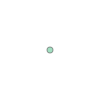

In [56]:
df_stops.loc[df_stops.stop_id=='21113','geometry'].values[0]

In [60]:
# df_stops_in_route['geometry'] = df_stops_in_route['stop_id_list'].apply(get_route_geometry_from_stops)
route_geoms = []
failed = {}
for i, row in df_stops_in_route.iterrows():
    route_id = row['route_id']
    try:
        stop_ids_for_this_route = row['stop_id_list']
        route_geometry = get_route_geometry_from_stops(stop_ids_for_this_route)
        route_geoms.append(route_geometry)
    except Exception as e:
        print(e)
        failed[route_id] = e

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements



In [61]:
failed

{12469: shapely.errors.GEOSException('IllegalArgumentException: point array must contain 0 or >1 elements\n'),
 7328: shapely.errors.GEOSException('IllegalArgumentException: point array must contain 0 or >1 elements\n'),
 7533: shapely.errors.GEOSException('IllegalArgumentException: point array must contain 0 or >1 elements\n'),
 9340: shapely.errors.GEOSException('IllegalArgumentException: point array must contain 0 or >1 elements\n')}

In [66]:
df_stops_in_route[df_stops_in_route.route_id.isin([12469,7328,7533,9340])]

,route_id,stop_id_list
884,12469,[38478]
6275,7328,[35746]
6366,7533,[35746]
7188,9340,[35746]


In [64]:
df_routes[df_routes.route_id==12469]

,agency_id,route_desc,route_id,route_long_name,route_short_name,route_type
7616,38,CS-DLF Home Town - CS-Dayanand Sagar College K...,12469,DLF-DSATM,DSIT-4,3


## Reading Vehicle Live Data

In [ ]:
pt = '/Users/gouherdanish/Documents/Danish/codes/blmc/data/Aug17-19/cistup-videoserver/nas_mount/Brij_work/BTS_project/s3_flatening/s3_bucket_aws_cli_processed/date=2025-08-17/part-00000-8fad8879-efd3-407b-8962-0a3ec55b519b.c000.snappy_flat.parquet'
df = pq.read_table(pt).to_pandas()

In [3]:
df.head()

,id,system_time,current_status,stop_id,vehicle_timestamp,trip_id,start_time,start_date,schedule_relationship,route_id,latitude,longitude,bearing,vehicle_id,label,date
0,8496,2025-08-17T20:00:05.913847,1,"""38058""","""1755460791""","""68089066""","""18:00:00""","""20250817""","""SCHEDULED""","""1801""",12.948634,77.593421,326.04,"""18638""","""KA57F4711""",2025-08-17
1,5769,2025-08-17T23:29:55.793772,1,"""24841""","""1755473381""","""""","""""","""""","""UNSCHEDULED""","""""",13.026876,77.638504,22.00,"""20909""","""KA57F3050""",2025-08-17
2,8514,2025-08-17T20:00:05.913847,1,"""38058""","""1755460763""","""68088563""","""21:00:00""","""20250817""","""SCHEDULED""","""1725""",13.042497,77.597600,38.00,"""26944""","""KA51AK0577""",2025-08-17
3,4659,2025-08-17T23:29:55.793772,1,"""38058""","""1755185449""","""""","""""","""""","""UNSCHEDULED""","""""",13.017431,77.561104,124.00,"""23017""","""KA57F0143""",2025-08-17
4,8200,2025-08-17T20:00:05.913847,1,"""38058""","""1755460791""","""68066508""","""19:45:00""","""20250817""","""SCHEDULED""","""1665""",12.791842,77.729217,284.27,"""26284""","""KA51AH7673""",2025-08-17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014327 entries, 0 to 10014326
Data columns (total 16 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   id                     object  
 1   system_time            object  
 2   current_status         object  
 3   stop_id                object  
 4   vehicle_timestamp      object  
 5   trip_id                object  
 6   start_time             object  
 7   start_date             object  
 8   schedule_relationship  object  
 9   route_id               object  
 10  latitude               float64 
 11  longitude              float64 
 12  bearing                float64 
 13  vehicle_id             object  
 14  label                  object  
 15  date                   category
dtypes: category(1), float64(3), object(12)
memory usage: 1.1+ GB
